In [1]:
import string
import random
import numpy as np
import matplotlib.pyplot as plot

In [2]:
# HELPER FUNCTIONS

def chunker(iterable, chunksize):
    return zip(*[iter(iterable)] * chunksize)
    
def rpad(l):
    for i in range(4 - len(l)):
        l.append("/")
    return l

def depad(l):
    try:
        while l[-1] == "/":
            l.pop()
    except:
        pass
    return l


In [3]:
class Tube:
    content = []
    def __init__(self, full, diff_content):
        
        if not full: self.content = diff_content
        else: self.content = []
            
            
    def is_complete(self):
        return (len(self.content) == 4 and len(set(self.content)) == 1) or len(self.content) == 0
    
    def display_tube(self):
        tmp = self.content
        to_pad = 4 -len(tmp)
        
        for i in range(to_pad):
            tmp.append(" ")
            
        while tmp:
            print("|" + str(tmp.pop()) + "|")
            
                    

In [17]:
game_modes = {
    'easy' : 3,
    'medium' : 5,
    'hard' : 9,
    'very hard' : 11,
    'ufff' : 22,
}

class Game:
    diff_contents = list(string.ascii_lowercase)
    list_of_tubes = []
    
    def __init__(self, game_mode):

        no_of_tubes = game_modes[game_mode]
        if no_of_tubes < 5: no_of_empty_tubes = 1
        else: no_of_empty_tubes = 2
            
        self.no_of_empty_tubes = no_of_empty_tubes

        self.Actions = {}    
        for i in range(no_of_tubes):
            for j in range(1, no_of_tubes):
                if i == j:
                    pass
                else:
                    t_str = str(i) + " to " + str(j)
                    self.Actions[t_str] = (i, j)
                    t_str = str(j) + " to " + str(i)
                    self.Actions[t_str] = (j, i)
        
        all_contents = []
        self.list_of_tubes = []
        for i in range(no_of_tubes - no_of_empty_tubes):
            all_contents.extend(self.diff_contents[i] * 4)

        random.seed(7)    
        random.shuffle(all_contents)
        
        for each in chunker(all_contents, 4):            
            t = Tube(False, list(each))
            while t.is_complete():
                t = Tube(False, list(each))
            self.list_of_tubes.append(t) 
            
        for each in range(no_of_empty_tubes):
            self.list_of_tubes.append(Tube(True, []))
        
        self.pours = 0
        
        
    def get_list_of_tubes(self):
        return self.list_of_tubes            
       

    def is_allowed_pour(self, state, action):
        tmp_tubes = []
        for each in chunker(state, 4):
            tmp_tubes.append(list(each))
        from_tube = tmp_tubes[action[0]]
        to_tube = tmp_tubes[action[1]]

        depad(from_tube)
        depad(to_tube)

        i = 2
        available_space = 4 - len(to_tube)
        if not self.list_of_tubes[action[0]].is_complete() and len(from_tube) > 0 and len(to_tube) < 4 and (len(to_tube) == 0 or from_tube[-1] == to_tube[-1]):    
            return True
        else: return False        
    
    def display_tubes(self):
        for each in self.list_of_tubes:
            tmp = each.content.copy()
            to_pad = 4 -len(tmp)

            for i in range(to_pad):
                tmp.append(" ")

            while tmp:
                print("|" + str(tmp.pop()) + "|")  
            
            print()
            
    def game_over(self):
        curr_state = self.flatten_tubes()
        for each_action in self.Actions:
            if self.is_allowed_pour(curr_state, self.Actions[each_action]):
                return 0
        
        for each in self.list_of_tubes:
            if not each.is_complete(): return -1
            
        return 1
    
    def update_game(self, action_key):
        action = self.Actions[action_key]
        from_tube = self.list_of_tubes[action[0]]
        to_tube = self.list_of_tubes[action[1]]

        depad(from_tube.content)
        depad(to_tube.content)        

        i = 2
        available_space = 4 - len(to_tube.content)
        if not from_tube.is_complete() and len(from_tube.content) > 0 and len(to_tube.content) < 4 and (len(to_tube.content) == 0 or from_tube.content[-1] == to_tube.content[-1]):
            for j in range(2, min(len(from_tube.content),available_space) + 1):
                if len(set(from_tube.content[-j:])) != 1:
                    break
                i += 1
            for k in range(i-1):
                to_tube.content.append(from_tube.content.pop())

            self.pours += 1
                
    
    def flatten_tubes(self):
        t = []
        for each in self.list_of_tubes:
            rpad(each.content)
            t.extend(each.content)
        return tuple(t)
    
    def display_tubes_graphically(self):

        color_dict = {
            'a' : 'red',
            'b' : 'blue',
            'c' : 'green',
            'd' : 'yellow',
            'e' : 'navy',
            'f' : 'orange',
            'g' : 'chocolate',
            'h' : 'indigo',
            'i' : 'olivedrab',
            'j' : 'steelblue',
            'k' : 'tan',
            '/' : 'white',
        }    

        i = 1

        for each in self.list_of_tubes:
            each.content = rpad(each.content)
            x = "Tube " + str(i)
            y1 = np.array([10])
            y2 = np.array([10]) 
            y3 = np.array([10])
            y4 = np.array([10])

            plot.subplot(1, len(self.list_of_tubes), i)
            plot.bar(x, y1, color=color_dict[each.content[0]], width=0.25)
            plot.bar(x, y2, bottom=y1, color=color_dict[each.content[1]], width=0.25)
            plot.bar(x, y3, bottom=y1+y2, color=color_dict[each.content[2]], width=0.25)
            plot.bar(x, y4, bottom=y1+y2+y3, color=color_dict[each.content[3]], width=0.25)
            ax = plot.gca()
            ax.get_yaxis().set_visible(False)

            i += 1

        # Display the plot
        plot.show()    



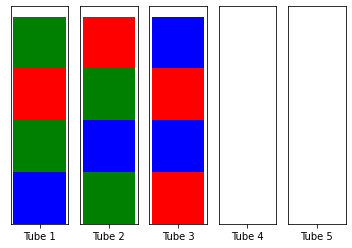

In [ ]:
g = Game('medium')
g.display_tubes_graphically()

while g.game_over() == 0:
    u_ip = input()
    try:
        if g.is_allowed_pour(g.flatten_tubes(), g.Actions[u_ip]):
            g.update_game(u_ip)
        else:
            print("Invalid move")
    except KeyError:
        print("Invalid Command")
    g.display_tubes_graphically()
    
if g.game_over() == -1:
    t_str = "Game over"
else:
    t_str = "You won"
        
print(t_str)        
print("Steps taken: ", g.pours)

        